# convolutional-neural-network

In [1]:
#import dependencies 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#normalising
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

In [4]:
#length of Data
print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 60000
Number of filtered test examples: 10000


In [5]:
#function for filter data number 3 or number 6 
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [6]:
#filtering data number 3 or number 6
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

In [7]:
#length of Data
print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


In [8]:
#reshaping data as needed by the model
x_train=np.reshape(x_train,(-1,28,28,1))
x_test=np.reshape(x_test,(-1,28,28,1))

In [9]:
#implementing one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [10]:
#creating model object & adding layers and forming the model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(padding="same"),
    tf.keras.layers.Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
    ])

In [11]:
#compiling
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),loss=tf.losses.mse,metrics=["accuracy"])


In [12]:
#control panel
epochs = 5
NUM_EXAMPLES = 5
x_train = x_train[:NUM_EXAMPLES]
y_train = y_train[:NUM_EXAMPLES]

In [13]:
#training the model
history = model.fit(x_train,y_train,batch_size=100,epochs= epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.2460 - accuracy: 0.0000e+00 - val_loss: 0.0974 - val_accuracy: 0.5132
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.0800 - accuracy: 0.6000 - val_loss: 0.0974 - val_accuracy: 0.5132
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.0800 - accuracy: 0.6000 - val_loss: 0.0974 - val_accuracy: 0.5132
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.0800 - accuracy: 0.6000 - val_loss: 0.0974 - val_accuracy: 0.5132
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0800 - accuracy: 0.6000 - val_loss: 0.0974 - val_accuracy: 0.5132


In [14]:
#save the model
history.history

{'loss': [0.24603939056396484,
  0.07999999821186066,
  0.07999999821186066,
  0.07999999821186066,
  0.07999999821186066],
 'accuracy': [0.0,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579,
  0.6000000238418579],
 'val_loss': [0.09735772013664246,
  0.09735772013664246,
  0.09735772013664246,
  0.09735772013664246,
  0.09735772013664246],
 'val_accuracy': [0.5132113695144653,
  0.5132113695144653,
  0.5132113695144653,
  0.5132113695144653,
  0.5132113695144653]}

In [15]:
# create the dataframe
df_history = pd.DataFrame()
df_history['accuracy']  = history.history['accuracy']
df_history['loss']      = history.history['loss']
df_history['val_accuracy'] = history.history['val_accuracy']
df_history['val_loss']  = history.history['val_loss']
df_history.to_csv("history.csv", index = False)
print(df_history.shape)
df_history.head()

(5, 4)


,accuracy,loss,val_accuracy,val_loss
0,0.0,0.246039,0.513211,0.097358
1,0.6,0.080000,0.513211,0.097358
2,0.6,0.080000,0.513211,0.097358
3,0.6,0.080000,0.513211,0.097358
4,0.6,0.080000,0.513211,0.097358


In [16]:
# defining visualization function
def plt_losses(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

def plt_accuracies(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation accuracy")
  ax.plot(x, ty, 'r', label="Train accuracy")
  plt.legend() 
  plt.grid()
  fig.canvas.draw()



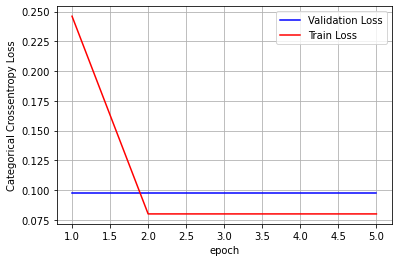

In [17]:
# visualization of loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_losses(x, vy, ty, ax)

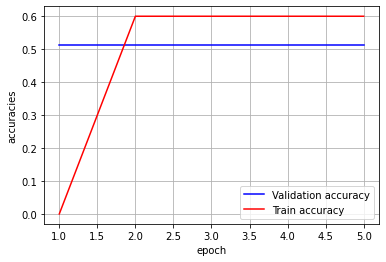

In [18]:
# visualization of accuracy
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracies')
x = list(range(1,epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_accuracies(x, vy, ty, ax)